# Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

__Disclaimer:__

_This dataset contains features of around 18k football players. We are expected to complete the following 5 major tasks. We are allowed to use only numerical attributes to cluster the data._

Language - Python (Also can use python libraries except for the $2^{nd}$ task)

In [2]:
# Import data
data_case1_normalized = pd.read_csv('Data_Case1_normalized.csv', sep = ",")
data_case2_normalized = pd.read_csv('Data_Case2_normalized.csv', sep = ",")
# Define Data for Case1 and same for Case 2
X1 = data_case1_normalized.iloc[:, 1:-2].values # From column 3 for non-normalized and upto last third column for normalized
print(f"Shape of Case 1 data: {X1.shape}")
X2 = data_case2_normalized.iloc[:, 1:-2].values
print(f"Shape of Case 2 data: {X2.shape}")

Shape of Case 1 data: (18147, 34)
Shape of Case 2 data: (18147, 37)


# Task 4: DBSCAN

1. Use DBSCAN to cluster the data.
2. DBSCAN algorithm requires 2 parameters - `epsilon` and `minPts`. Show all experiments you did to arrive at the _final eps_ and _minPts_.
3. Analyse the clusters formed.

Finally compare the clusters formed by each of the above technique. Which method is the best according to you for clustering the given dataset? Which clustering technique made the most meaningful clusters?

###### After a lot of hit and trial we arrived at the OPTIMAL/REQUIRED intervals from where we select our $\epsilon$ and $\mu$

In [3]:
# Apply grid search to find the optimal value for `epsilon` and `minPts`.
epsilon = np.linspace(30, 50, 9).tolist()# 40, 80, 9...
minPts = np.arange(14, 35).tolist()#12, 28

In [4]:
# Now loop over epsilon and minPts for Data Case .
sil_score = []; params_list = []; no_clusters = []
for eps in epsilon:
    for min_pt in minPts:
        clustering = DBSCAN(eps=eps, min_samples=min_pt).fit(X1)
        n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
        if n_clusters > 1:
            sil_score.append(silhouette_score(X1, clustering.labels_))
            params_list.append("eps={0:.2f}|mu={1:d}".format(eps, min_pt))
            no_clusters.append(n_clusters)
        else:
            continue

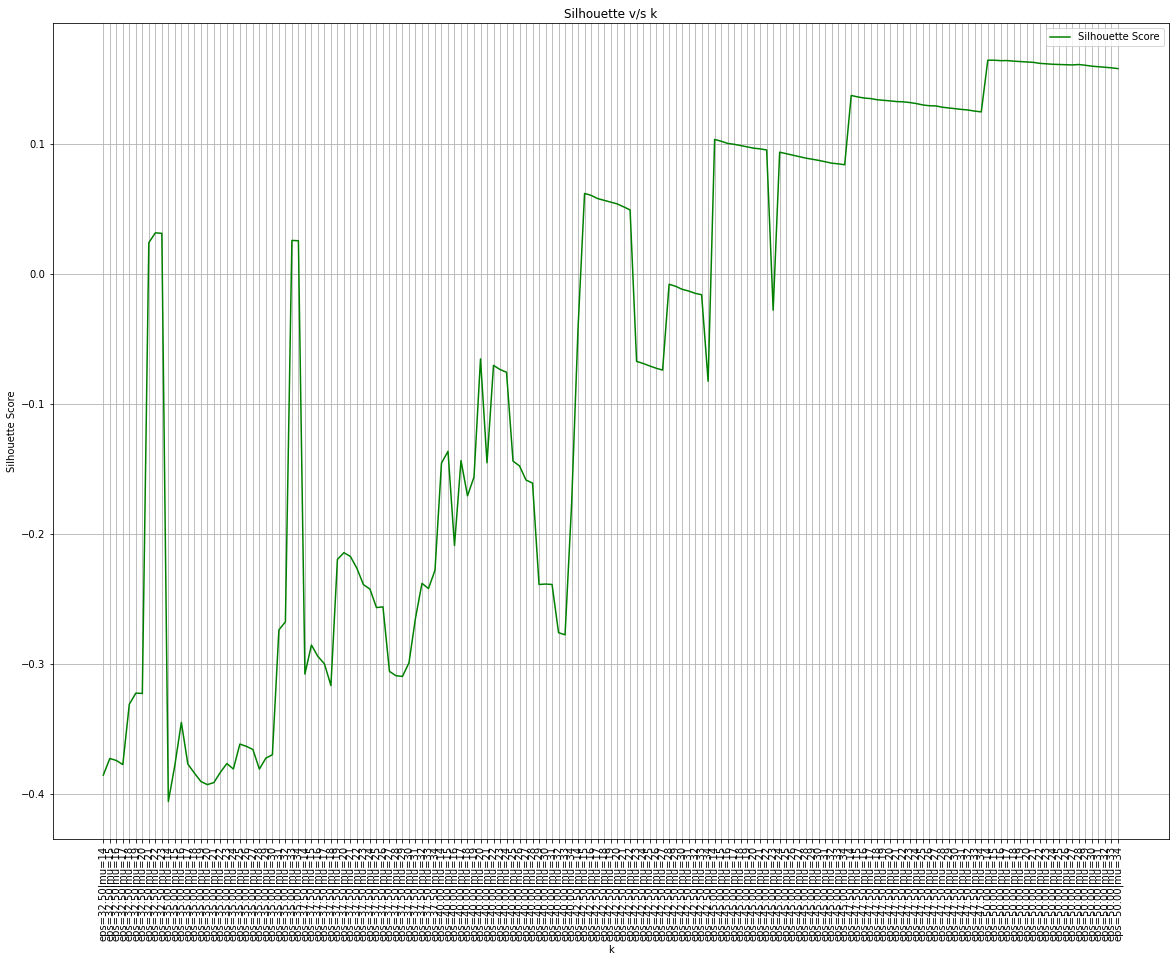

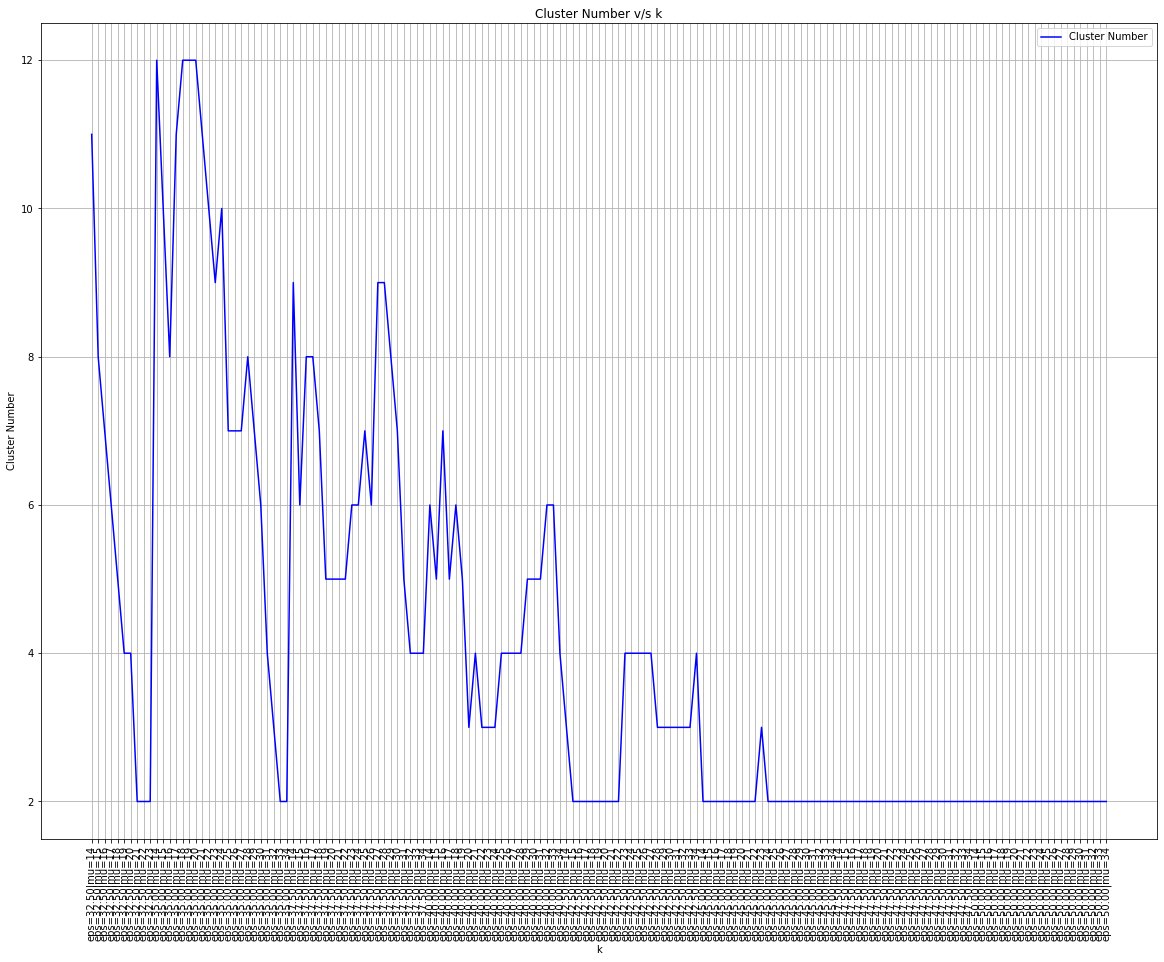

In [5]:
# Plot the silhouette scores and No. of clusters.
plt.figure(figsize = (20, 15))
plt.plot(params_list, sil_score, color = "g", label = "Silhouette Score")
plt.xlabel("k"); plt.ylabel("Silhouette Score"); plt.title("Silhouette v/s k"); plt.legend(loc = "best")
plt.xticks(rotation = 90); plt.grid(); plt.show()
plt.figure(figsize = (20, 15))
plt.plot(params_list, no_clusters, color = "b", label = "Cluster Number")
plt.xlabel("k"); plt.ylabel("Cluster Number"); plt.title("Cluster Number v/s k"); plt.legend(loc = "best")
plt.xticks(rotation = 90); plt.grid(); plt.show()

In [6]:
params_list

['eps=32.50|mu=14',
 'eps=32.50|mu=15',
 'eps=32.50|mu=16',
 'eps=32.50|mu=17',
 'eps=32.50|mu=18',
 'eps=32.50|mu=19',
 'eps=32.50|mu=20',
 'eps=32.50|mu=21',
 'eps=32.50|mu=22',
 'eps=32.50|mu=23',
 'eps=35.00|mu=14',
 'eps=35.00|mu=15',
 'eps=35.00|mu=16',
 'eps=35.00|mu=17',
 'eps=35.00|mu=18',
 'eps=35.00|mu=19',
 'eps=35.00|mu=20',
 'eps=35.00|mu=21',
 'eps=35.00|mu=22',
 'eps=35.00|mu=23',
 'eps=35.00|mu=24',
 'eps=35.00|mu=25',
 'eps=35.00|mu=26',
 'eps=35.00|mu=27',
 'eps=35.00|mu=28',
 'eps=35.00|mu=29',
 'eps=35.00|mu=30',
 'eps=35.00|mu=31',
 'eps=35.00|mu=32',
 'eps=35.00|mu=33',
 'eps=35.00|mu=34',
 'eps=37.50|mu=14',
 'eps=37.50|mu=15',
 'eps=37.50|mu=16',
 'eps=37.50|mu=17',
 'eps=37.50|mu=18',
 'eps=37.50|mu=19',
 'eps=37.50|mu=20',
 'eps=37.50|mu=21',
 'eps=37.50|mu=22',
 'eps=37.50|mu=23',
 'eps=37.50|mu=24',
 'eps=37.50|mu=25',
 'eps=37.50|mu=26',
 'eps=37.50|mu=27',
 'eps=37.50|mu=28',
 'eps=37.50|mu=29',
 'eps=37.50|mu=30',
 'eps=37.50|mu=31',
 'eps=37.50|mu=32',


In [7]:
# Now loop over epsilon and minPts for Data Case 2.
sil_score = []; params_list = []; no_clusters = []
for eps in epsilon:
    for min_pt in minPts:
        clustering = DBSCAN(eps=eps, min_samples=min_pt).fit(X2)
        n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
        if n_clusters > 1:
            sil_score.append(silhouette_score(X2, clustering.labels_))
            params_list.append("eps={0:.2f}|mu={1:d}".format(eps, min_pt))
            no_clusters.append(n_clusters)
        else:
            continue
            

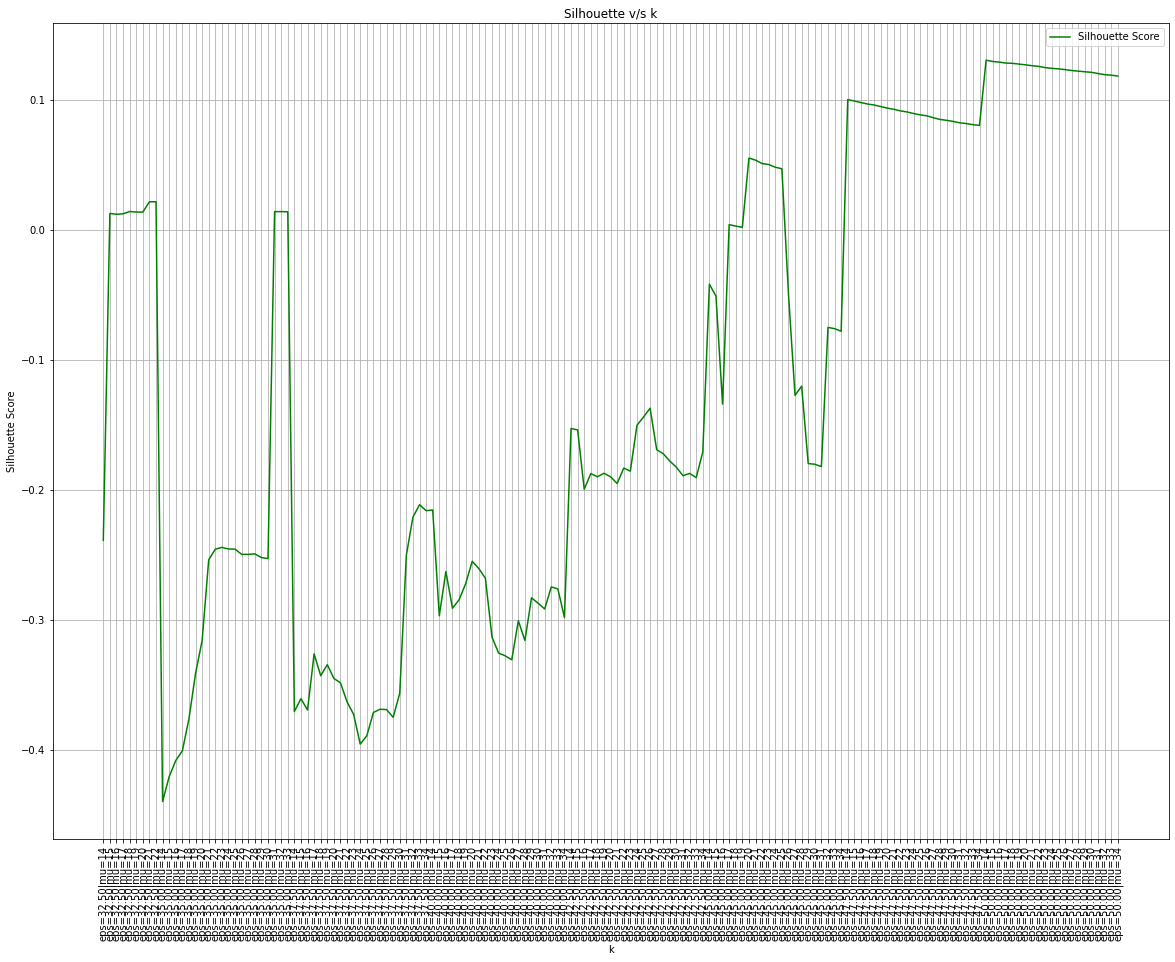

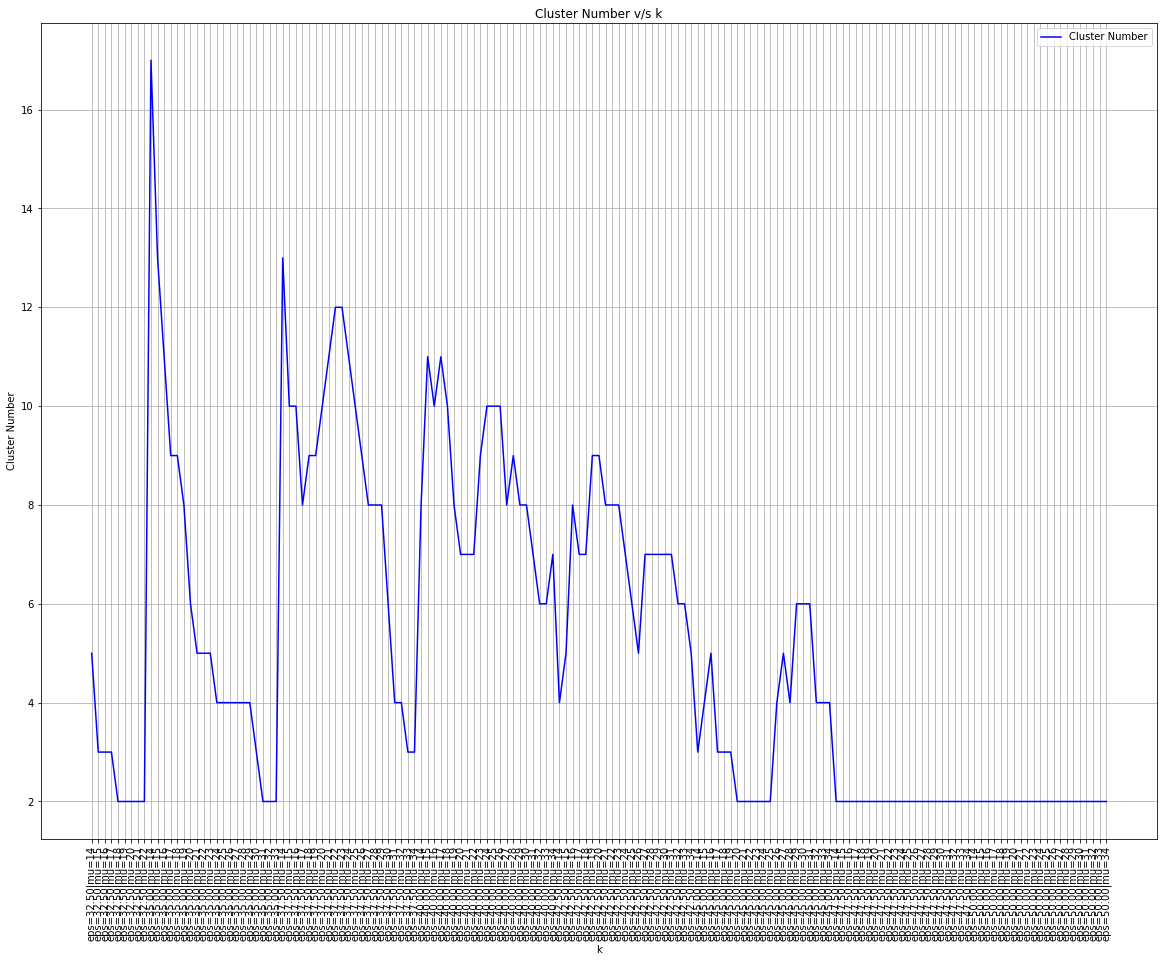

In [8]:
# Plot the silhouette scores and No. of clusters.
plt.figure(figsize = (20, 15))
plt.plot(params_list, sil_score, color = "g", label = "Silhouette Score")
plt.xlabel("k"); plt.ylabel("Silhouette Score"); plt.title("Silhouette v/s k"); plt.legend(loc = "best")
plt.xticks(rotation = 90); plt.grid(); plt.show()
plt.figure(figsize = (20, 15))
plt.plot(params_list, no_clusters, color = "b", label = "Cluster Number")
plt.xlabel("k"); plt.ylabel("Cluster Number"); plt.title("Cluster Number v/s k"); plt.legend(loc = "best")
plt.xticks(rotation = 90); plt.grid(); plt.show()

In [9]:
# Check number of clusters with Best Params...
best_eps_1, best_mu_1 = 40, 19
clustering1 = DBSCAN(eps = best_eps_1, min_samples = best_mu_1).fit(X1)
n_clusters1 = len(set(clustering1.labels_)) - (1 if -1 in clustering1.labels_ else 0)
print(f"Number of clusters formed with \u03B5 = {best_eps_1} and \u03BC = {best_mu_1}: {n_clusters1}")

Number of clusters formed with ε = 40 and μ = 19: 5


In [10]:
# Check number of clusters with Best Params...
best_eps_2, best_mu_2 = 78, 16
clustering2 = DBSCAN(eps = best_eps_2, min_samples = best_mu_2).fit(X2)
n_clusters2 = len(set(clustering2.labels_)) - (1 if -1 in clustering2.labels_ else 0)
print(f"Number of clusters formed with \u03B5 = {best_eps_2} and \u03BC = {best_mu_2}: {n_clusters2}")

Number of clusters formed with ε = 78 and μ = 16: 2
